> # Enough to be Dangeous: Polynomial Regression

> ### This is the 3rd notebook of my **"Enough to be Dangeous"** notebook series

See the other notebooks here:

[Simple Linear regression](https://www.kaggle.com/thaddeussegura/enough-to-be-dangeous-simple-linear-regression)

[Multiple Linear Regression](https://www.kaggle.com/thaddeussegura/enough-to-be-dangerous-multiple-linear-regression)


> ### This notebook is separated into two parts:

**1) Conceptual Overview:**  I will introduce the topic in 200 words or less.

**2) Implementation:**  I will implement the algorithm in as few lines as possible.

## Conceptual Overview

Like simple and multiple regression, Polynomial regression is a "supervised" "regression" algorithm.

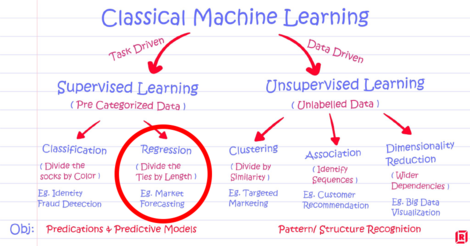

Supervised meaning we use labeled data to train the model.

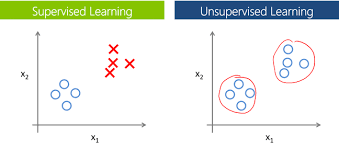


Regression meaning we predict a numerical value, instead of a “class”.

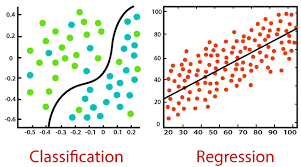

However, polynomial regression differs in that it allows us fit curved lines/planes to our data.

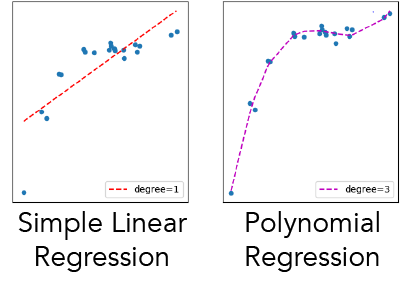

This is accomplished by "exponentiating" our variable by taking it to powers greater than 1. 

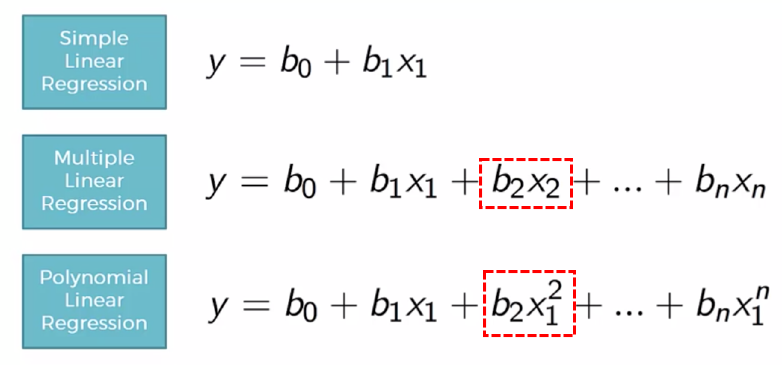

This makes it a fantastic modeling tool for "exponential" datasets. 

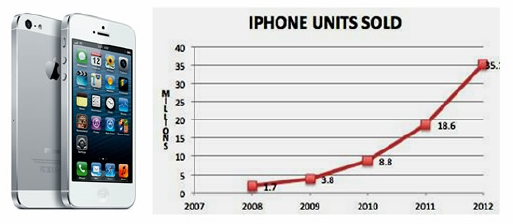

In practice, this is handled by our statistical software, we just need to select the "degree" of the polynomial.

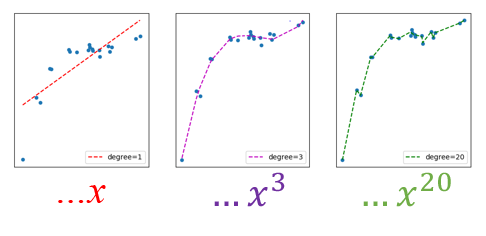

Our selection should seek to fit the current data well, and generalize to new data. 

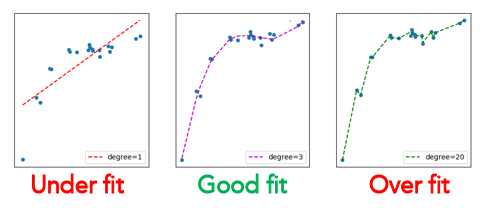

Overall, Polynomial Regression is an essential tool in your Machine Learning arsenal. However, it is very sensitive to outliers, and we must take care when selecting the degree to avoid overfitting.

## Implementation

In this section I will implement the code in its simplest verison so that it is understandable if you are brand new to machine learning. 

Below we will predict salary based on the current role someone is in.  Salary tends to grow exponentially with each promotion level so this makes it a good dataset for polynomial regression.

**The independent variables is**:
* Position Level
    
**The dependent variable is** 
* Salary
    
The first step is to start with "imports". These are "libraries" of pre-written code that will help us significantly.

In [1]:
#Numpy is used so that we can deal with array's, which are necessary for any linear algebra
# that takes place "under-the-hood" for any of these algorithms.

import numpy as np


#Pandas is used so that we can create dataframes, which is particularly useful when
# reading or writing from a CSV.

import pandas as pd


#Matplotlib is used to generate graphs in just a few lines of code.

import matplotlib.pyplot as plt


#LinearRegression is the class of the algorithm we will be using.

from sklearn.linear_model import LinearRegression

#Polynomial Features will allow us to fit a polynomial model to the data. 

from sklearn.preprocessing import PolynomialFeatures



With our imports complete, we now read in the data using Pandas.

We will set a independent variable (X) and a dependent variable (y).

In [2]:
#read the data from csv
dataset = pd.read_csv('../input/position-salaries/Position_Salaries.csv')

#set independent variable by using all rows, but just column 1.
X = dataset.iloc[:, 1:2].values

#set the dependent variable using all rows but only the last column. 
y = dataset.iloc[:, 2].values

#take a look at our dataset
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


To keep this conceptually simple and avoid abstraction, we are using a very small dataset here.  

Because of this we will not be splitting part of it out into a training/validation/test set.

If we had data on 1000's of employees, we would absolutely complete this step.

So now we can go right to defining the model.

We will select a degree of 4. 

In [3]:
#I am going to wrap this all in a function.
def define_model(degree):

    #create an object of the class PolynomialFeatures
    poly_reg = PolynomialFeatures(degree)

    #call fit_transform on the x variables.
    X_poly = poly_reg.fit_transform(X)

    #now fit the transformed x's to the y's
    poly_reg.fit(X_poly, y)

    #create an object of the class LinearRegression
    lin_reg = LinearRegression()

    #fit the model to our transformed X
    lin_reg.fit(X_poly, y)
    
    #return these so we can pass them into the visualization
    return lin_reg, poly_reg

#call our function with the desired degrees (4). 
lin_reg, poly_reg = define_model(4)

That's it! 

Now we can visualize the results and see how it did. 

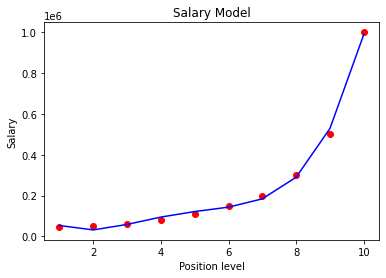

In [4]:
# create a function so we can reuse the code.
def show_regression(lin_reg, poly_reg):
    #create a scatter plot with x and y.
    plt.scatter(X, y, color = 'red')
    #plot the predictions as a blue line.
    plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
    #axes and title labels.
    plt.title('Salary Model')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    #show the completed plot
    plt.show()
    
#call our function.     
show_regression(lin_reg, poly_reg)

We can use our model to make a prediction now.  Let's look at someone who's been a Partner (level 7) for a while, and is applying for a Senior Partner Role (level 8).  Let's predict what they may currently be making by calling our model on level 7.5

In [5]:
#Predicting a new result with Polynomial Regression
#call fit transform on the position level using the poly_reg object.
#feed this into the linear regression object to predict it.
#convert it to an int so it is easier to read (by default its a floating point in an array)
#assign to a variable so we can print it.

salary = int(lin_reg.predict(poly_reg.fit_transform([[7.5]])))

print("Estimated Salary: $", salary)

Estimated Salary: $ 225126
